# ここ参考にしてます
http://tsuwabuki.hatenablog.com/entry/2016/08/19/083337

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)

/Users/yasumizuyoshiaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
# がんデータ
from sklearn.datasets import load_breast_cancer

In [59]:
cancer = load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [69]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
scaler = StandardScaler()
# model = TSNE(n_components=2)
model = PCA(n_components=2)
result = model.fit_transform(scaler.fit_transform(X_train))

In [46]:
X_train.shape

(514, 8)

In [47]:
X_train[y_train == 1]

array([[   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,  128.   ,   88.   , ...,   36.5  ,    1.057,   37.   ],
       [   7.   ,  160.   ,   54.   , ...,   30.5  ,    0.588,   39.   ],
       ..., 
       [  11.   ,  138.   ,   74.   , ...,   36.1  ,    0.557,   50.   ],
       [  10.   ,  101.   ,   86.   , ...,   45.6  ,    1.136,   38.   ],
       [   0.   ,  141.   ,    0.   , ...,   42.4  ,    0.205,   29.   ]])

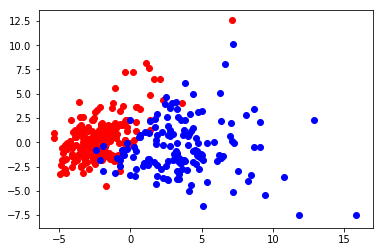

In [77]:
plt.scatter(result[y_train == 1,0], result[y_train == 1,1], c='r')
plt.scatter(result[y_train == 0,0], result[y_train == 0,1], c='b')

In [72]:
# calibration なし
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preda = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

In [73]:
print("\tBrier:", brier_score_loss(y_test, y_preda))
print("\tPrecision:", precision_score(y_test, y_pred))
print("\tRecall:", recall_score(y_test, y_pred))
print("\tF1:", f1_score(y_test, y_pred))

	Brier: 0.0390425531915
	Precision: 0.973913043478
	Recall: 0.925619834711
	F1: 0.949152542373


In [74]:
# calibration あり
clf = CalibratedClassifierCV(RandomForestClassifier(), cv=5, method='isotonic')
clf.fit(X_train, y_train)
y_preda = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

In [75]:
print("\tBrier:", brier_score_loss(y_test, y_preda))
print("\tPrecision:", precision_score(y_test, y_pred))
print("\tRecall:", recall_score(y_test, y_pred))
print("\tF1:", f1_score(y_test, y_pred))

	Brier: 0.028630669582
	Precision: 0.967213114754
	Recall: 0.97520661157
	F1: 0.971193415638
